<a href="https://colab.research.google.com/github/ishtiaque7/Artificial_Intelligence_AILab/blob/main/AI_Lab_Regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/package.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


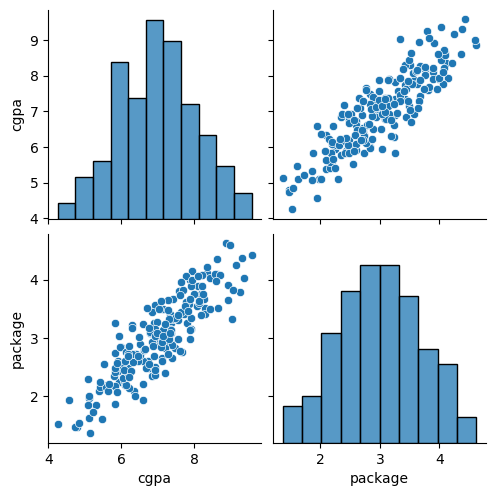

In [ ]:
sns.pairplot(df)

Text(0, 0.5, 'Package')

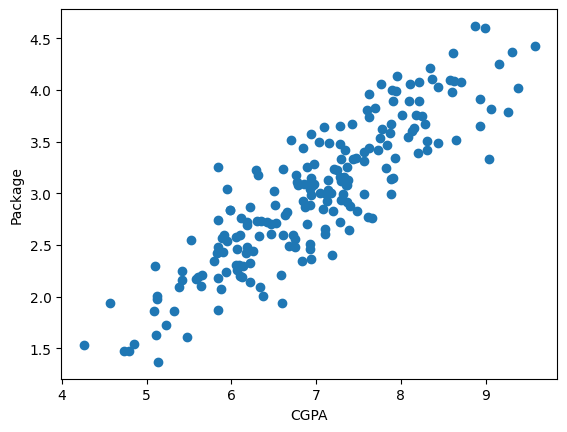

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

Text(0, 0.5, 'Package')

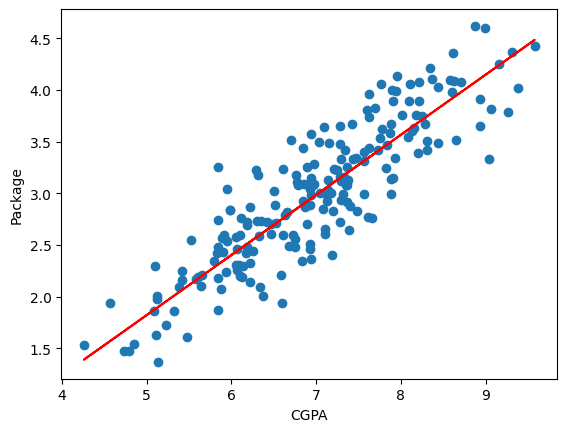

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), c='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [ ]:
a=lr.coef_
a

array([0.58154877])

In [ ]:
b = lr.intercept_
b

-1.0859839580358033

In [ ]:
X_test.values

array([[6.92],
       [9.38],
       [7.34],
       [5.13],
       [7.88],
       [7.63],
       [6.63],
       [6.94],
       [7.15],
       [8.65],
       [8.01],
       [6.94],
       [6.61],
       [6.42],
       [8.18],
       [7.4 ],
       [8.71],
       [6.87],
       [5.64],
       [7.56],
       [9.26],
       [6.84],
       [5.09],
       [5.83],
       [8.1 ],
       [5.53],
       [8.62],
       [5.94],
       [4.57],
       [5.42],
       [5.84],
       [8.21],
       [7.89],
       [7.09],
       [6.29],
       [5.98],
       [7.32],
       [8.44],
       [7.3 ],
       [6.93]])

In [ ]:
y_test.values

array([3.09, 4.02, 3.42, 1.37, 3.14, 3.96, 2.79, 3.57, 3.49, 3.52, 3.76,
       2.98, 2.6 , 2.72, 3.76, 2.88, 4.08, 2.87, 2.1 , 3.31, 3.79, 2.35,
       1.86, 2.42, 3.89, 2.55, 4.36, 2.24, 1.94, 2.16, 3.26, 4.08, 3.67,
       3.64, 3.23, 2.84, 2.99, 4.03, 2.94, 2.51])

In [ ]:
lr.predict([[8.58]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.90370445])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.29931188593316804


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.1370062519255722


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.370143555834182


In [ ]:
r2 = r2_score(y_test,y_pred)
print("R2-Score",r2)

R2-Score 0.7283345498058083


Multiple linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

In [ ]:
import numpy
import matplotlib.pyplot as plt


X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


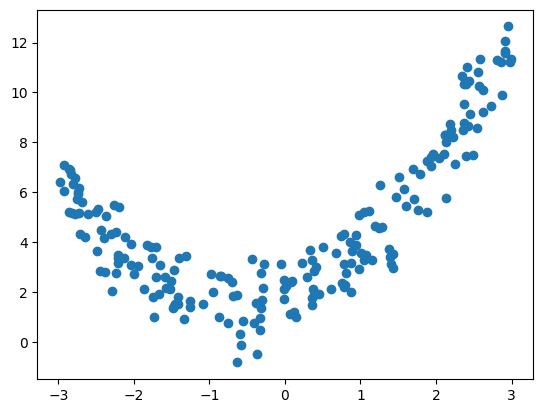

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.30606449039851635

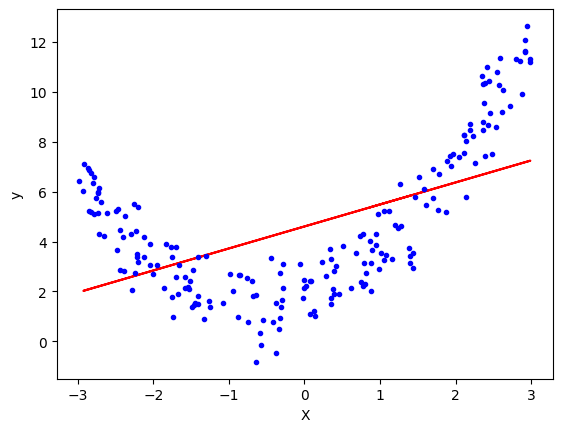

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:

poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
X_train_trans.shape

(160, 3)

In [ ]:
print(X_train[0])
print(X_train_trans[0])

[1.39626179]
[1.         1.39626179 1.94954699]


In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)


[[0.         0.93728794 0.83151963]]
[1.90454676]


In [ ]:
y_pred = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.9100082633098345

In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

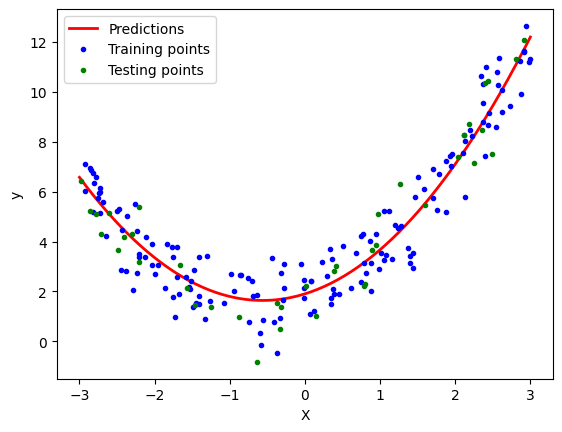

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


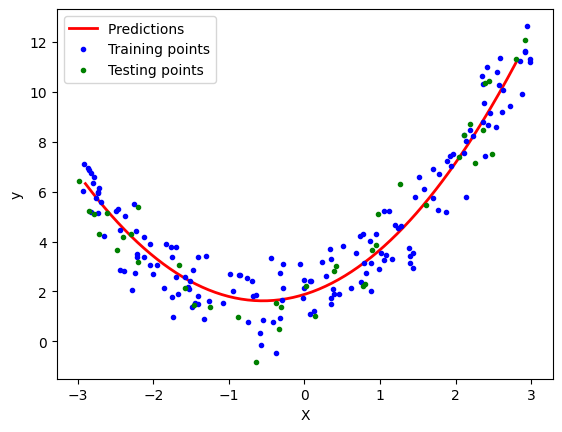

0.908502026621377


In [ ]:
# Applying Gradient Descent
sgd = SGDRegressor(max_iter=1000)
sgd.fit(X_train_trans,y_train)
y_pred = sgd.predict(X_test_trans)


X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)


plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions ")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(r2_score(y_test,y_pred))